In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load a data 
data = pd.read_csv('housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# makesure that no missing any data
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
# split data into training and testing data
from sklearn .model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
# show all training data 
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19870,-119.36,36.33,11.0,3221.0,617.0,1351.0,565.0,2.9844,INLAND,132000.0
9348,-122.56,37.98,36.0,2649.0,542.0,1111.0,557.0,4.8056,NEAR BAY,345700.0
1161,-121.54,39.51,33.0,3585.0,757.0,1887.0,765.0,2.5020,INLAND,62100.0
17946,-121.96,37.33,26.0,3269.0,788.0,1427.0,696.0,4.2136,<1H OCEAN,288300.0
8863,-118.38,34.06,52.0,1311.0,217.0,578.0,205.0,7.6771,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
16878,-122.39,37.60,44.0,2304.0,384.0,986.0,379.0,4.6520,NEAR OCEAN,387100.0
10679,-117.80,33.52,50.0,1152.0,341.0,519.0,225.0,3.0530,<1H OCEAN,500001.0
15959,-122.43,37.71,35.0,2878.0,564.0,1633.0,528.0,4.5000,NEAR BAY,266900.0
1457,-121.97,37.97,26.0,1977.0,264.0,817.0,273.0,5.7512,INLAND,240200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

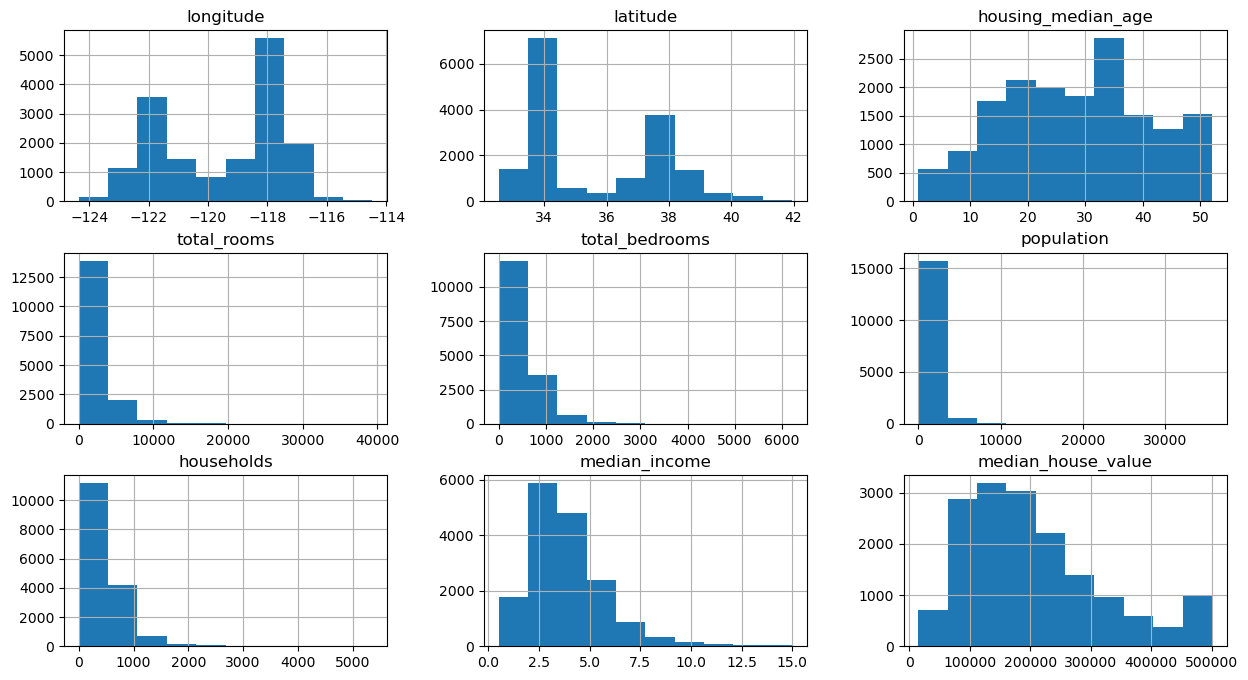

In [12]:
train_data.hist(figsize=(15,8))

In [13]:
# each feature has a correlation with itself
train_data.corr()

C:\Users\ME\AppData\Local\Temp\ipykernel_232\1460823726.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924501,-0.109651,0.041691,0.065156,0.100755,0.052668,-0.018100,-0.047301
latitude,-0.924501,1.000000,0.012435,-0.034131,-0.062877,-0.109097,-0.067829,-0.078701,-0.144031
housing_median_age,-0.109651,0.012435,1.000000,-0.367155,-0.326348,-0.301567,-0.308435,-0.115215,0.108755
total_rooms,0.041691,-0.034131,-0.367155,1.000000,0.929943,0.857657,0.918786,0.198522,0.133834
total_bedrooms,0.065156,-0.062877,-0.326348,0.929943,1.000000,0.879136,0.980071,-0.009995,0.046178
population,0.100755,-0.109097,-0.301567,0.857657,0.879136,1.000000,0.908256,0.003483,-0.028035
households,0.052668,-0.067829,-0.308435,0.918786,0.980071,0.908256,1.000000,0.010285,0.060604
median_income,-0.018100,-0.078701,-0.115215,0.198522,-0.009995,0.003483,0.010285,1.000000,0.693090
median_house_value,-0.047301,-0.144031,0.108755,0.133834,0.046178,-0.028035,0.060604,0.693090,1.000000


C:\Users\ME\AppData\Local\Temp\ipykernel_232\1179452894.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<Axes: >

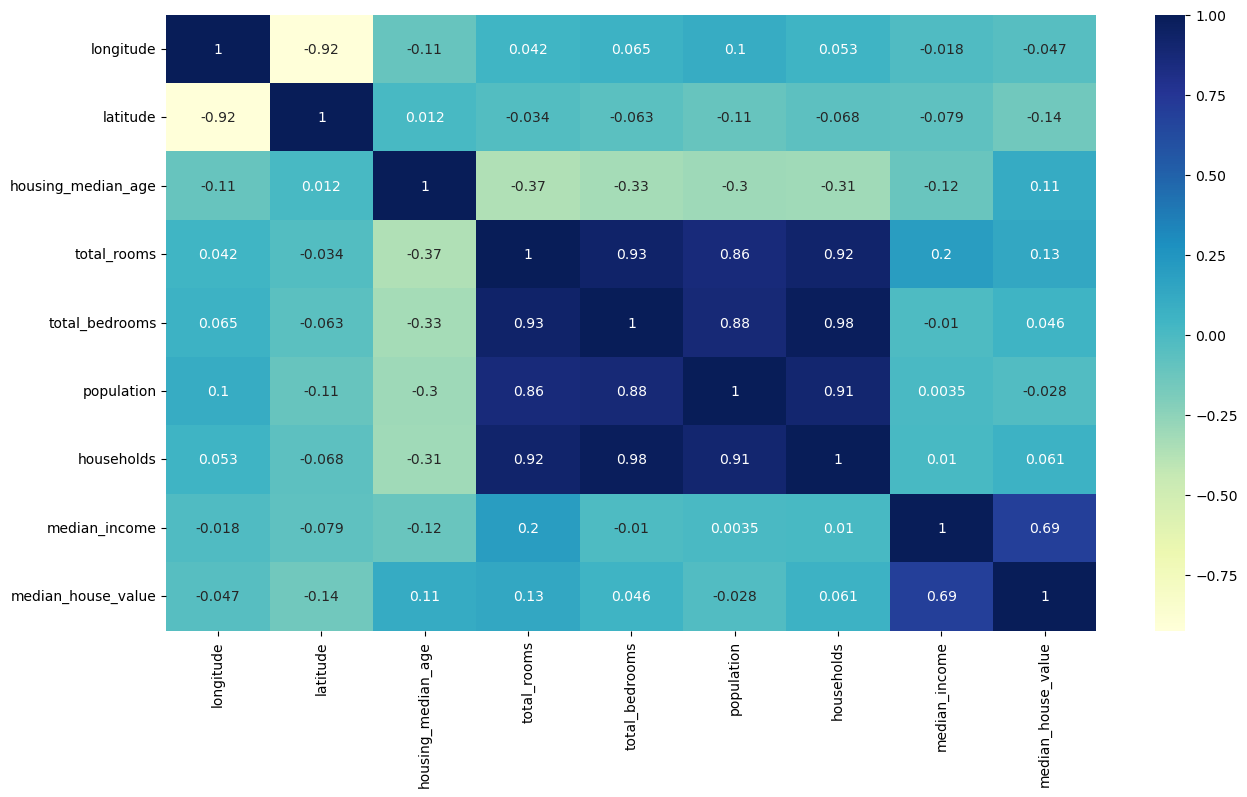

In [14]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [15]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7222
INLAND        5191
NEAR OCEAN    2114
NEAR BAY      1815
ISLAND           4
Name: ocean_proximity, dtype: int64

In [16]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19870,0,1,0,0,0
9348,0,0,0,1,0
1161,0,1,0,0,0
17946,1,0,0,0,0
8863,1,0,0,0,0
...,...,...,...,...,...
16878,0,0,0,0,1
10679,1,0,0,0,0
15959,0,0,0,1,0
1457,0,1,0,0,0


In [17]:
# we can join these years with our training data
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19870,-119.36,36.33,11.0,3221.0,617.0,1351.0,565.0,2.9844,INLAND,132000.0,0,1,0,0,0
9348,-122.56,37.98,36.0,2649.0,542.0,1111.0,557.0,4.8056,NEAR BAY,345700.0,0,0,0,1,0
1161,-121.54,39.51,33.0,3585.0,757.0,1887.0,765.0,2.5020,INLAND,62100.0,0,1,0,0,0
17946,-121.96,37.33,26.0,3269.0,788.0,1427.0,696.0,4.2136,<1H OCEAN,288300.0,1,0,0,0,0
8863,-118.38,34.06,52.0,1311.0,217.0,578.0,205.0,7.6771,<1H OCEAN,500001.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16878,-122.39,37.60,44.0,2304.0,384.0,986.0,379.0,4.6520,NEAR OCEAN,387100.0,0,0,0,0,1
10679,-117.80,33.52,50.0,1152.0,341.0,519.0,225.0,3.0530,<1H OCEAN,500001.0,1,0,0,0,0
15959,-122.43,37.71,35.0,2878.0,564.0,1633.0,528.0,4.5000,NEAR BAY,266900.0,0,0,0,1,0
1457,-121.97,37.97,26.0,1977.0,264.0,817.0,273.0,5.7512,INLAND,240200.0,0,1,0,0,0


In [18]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [19]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19870,-119.36,36.33,11.0,3221.0,617.0,1351.0,565.0,2.9844,132000.0,0,1,0,0,0
9348,-122.56,37.98,36.0,2649.0,542.0,1111.0,557.0,4.8056,345700.0,0,0,0,1,0
1161,-121.54,39.51,33.0,3585.0,757.0,1887.0,765.0,2.5020,62100.0,0,1,0,0,0
17946,-121.96,37.33,26.0,3269.0,788.0,1427.0,696.0,4.2136,288300.0,1,0,0,0,0
8863,-118.38,34.06,52.0,1311.0,217.0,578.0,205.0,7.6771,500001.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16878,-122.39,37.60,44.0,2304.0,384.0,986.0,379.0,4.6520,387100.0,0,0,0,0,1
10679,-117.80,33.52,50.0,1152.0,341.0,519.0,225.0,3.0530,500001.0,1,0,0,0,0
15959,-122.43,37.71,35.0,2878.0,564.0,1633.0,528.0,4.5000,266900.0,0,0,0,1,0
1457,-121.97,37.97,26.0,1977.0,264.0,817.0,273.0,5.7512,240200.0,0,1,0,0,0


<Axes: >

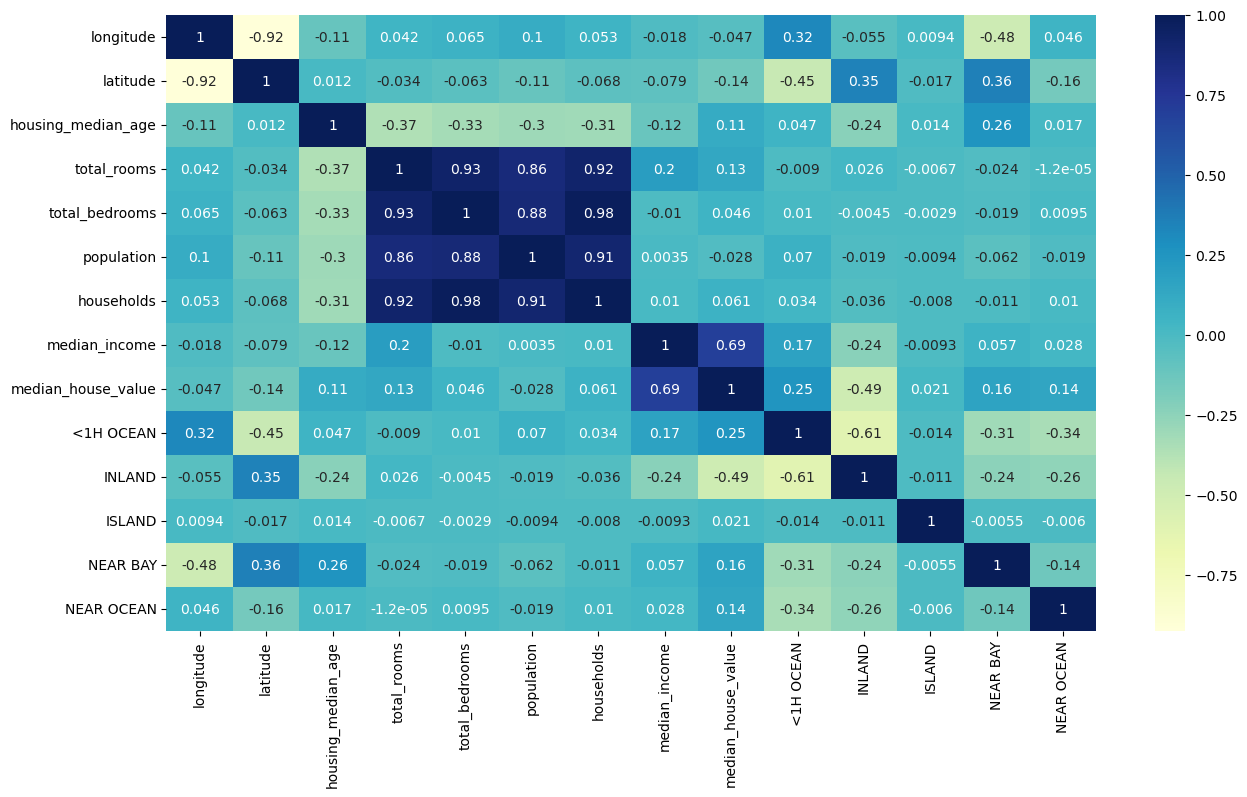

In [20]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

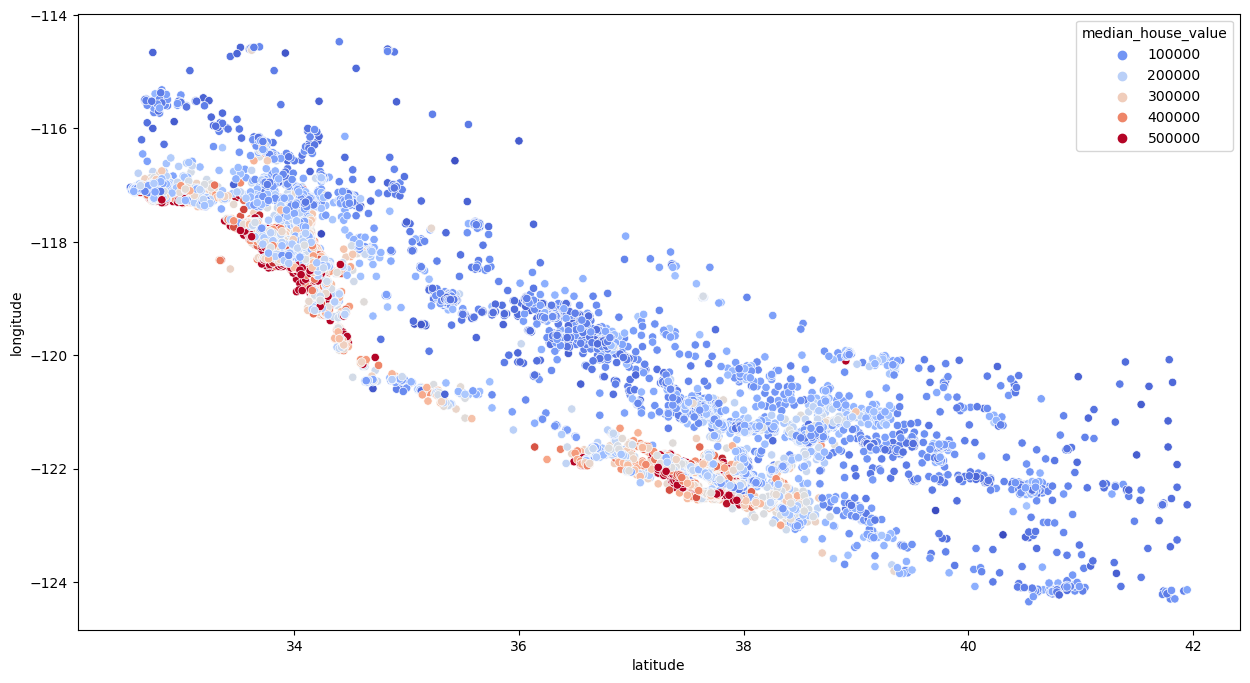

In [21]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')
# red gets the more expensive houses
# blue is the less houses

In [22]:
# we are going to combine more interesting features
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_bedrooms'] / train_data['households']

<Axes: >

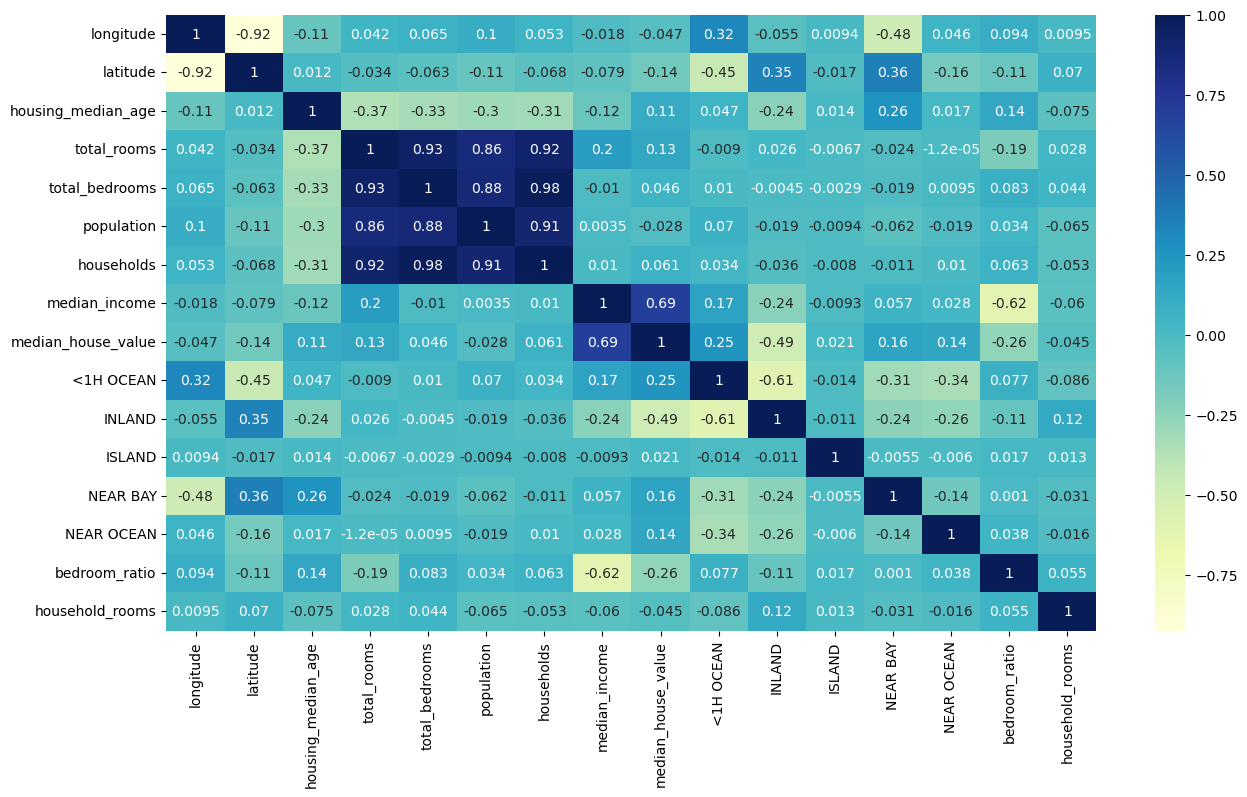

In [23]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

x_train, y_train= train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scalar.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [25]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_bedrooms'] / test_data['households']

In [26]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [27]:
reg.score(x_test, y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-1.6027078542227685e+26

In [28]:
x_test_s = scalar.transform(x_test)

In [29]:
reg.score(x_test_s, y_test)

-0.7968330600717888

In [30]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [31]:
forest.score(x_test, y_test)

0.3374853493291319

In [37]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
parameters_grid = {
    "n_estimators" : [100, 200, 300],
    "max_features" :[2,4],
    "min_samples_split" :[None, 4, 8]
}
grid_search = GridSearchCV(forest, parameters_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(x_train_s, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-package

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4],
                         'min_samples_split': [None, 4, 8],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, min_samples_split=4, n_estimators=200)

In [39]:
best_forest = grid_search.best_estimator_

In [40]:
best_forest.score(x_test_s, y_test)

0.43326979954326483